# Problem Statement

Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behavior to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry


# Phase1: Model Building On Training Data

# Step1: Read Data

In [1]:
train = pd.read_csv("Train.csv")
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [2]:
train.shape

(33908, 17)

In [3]:
train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

# Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

## 2.1 Missing Data Analysis 

In [4]:
train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

## 2.2 Data Type Analysis 

In [5]:
train.dtypes

feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7       int64
feature_8       int64
feature_9       int64
feature_10      int64
feature_11      int64
feature_12      int64
feature_13      int64
feature_14      int64
feature_15      int64
labels          int64
dtype: object

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [6]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


### 2.3.1 Box Plot of CONTINUOUS variables 

In [7]:
train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

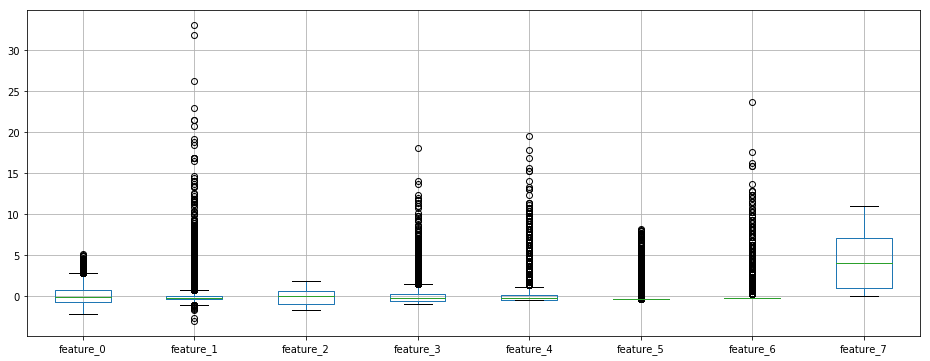

In [8]:
plt.figure(figsize=(16,6))
train.boxplot(column=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
                       'feature_5', 'feature_6', 'feature_7'])

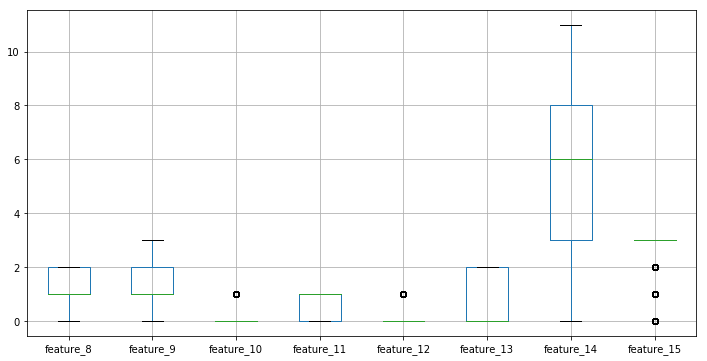

In [10]:
plt.figure(figsize=(12,6))
train.boxplot(column=['feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 
                                   'feature_13', 'feature_14', 'feature_15'])

<b> From the plots we can see that, there are lots of outliers in each varibale. </b>

### 2.3.2 Plot for Continuous variables

### 2.3.3 Histogram Plots Of Continuous Variables 

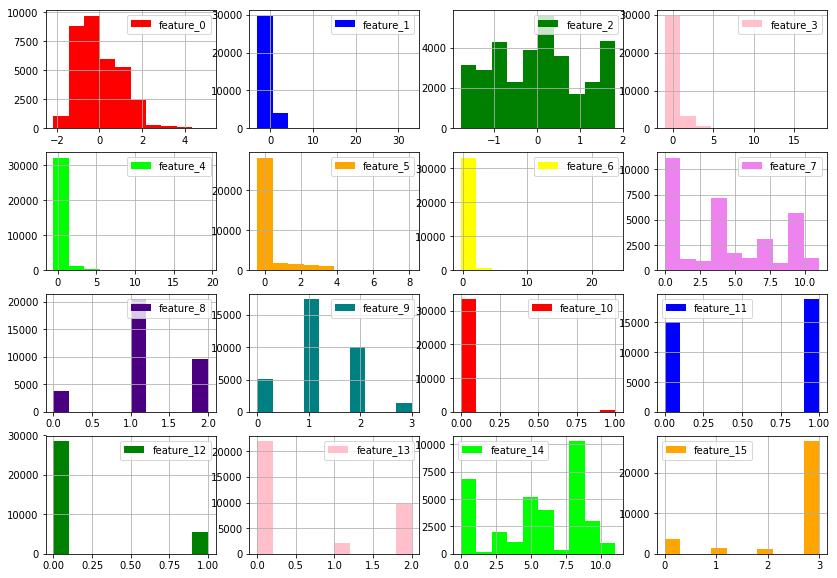

In [15]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange']
for i,j in zip(range(1,17),train.columns[:-1]):
    plt.subplot(4,4,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

### 2.3.4 Density Plots Of Continuous Variables 

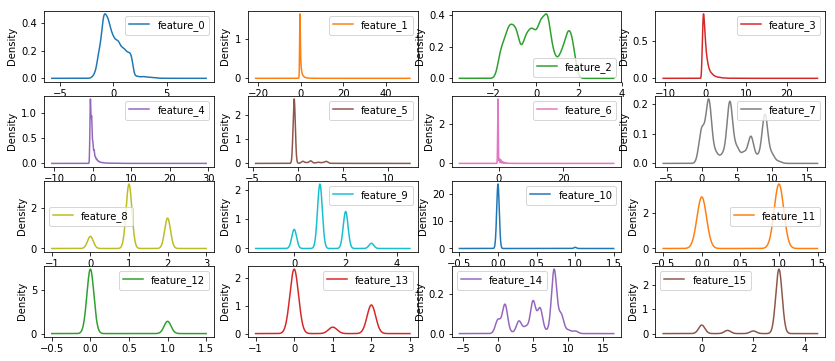

In [16]:
train[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15']].plot(kind='density', subplots=True, 
                                                    layout=(4,4), sharex=False,
                                                    sharey=False, figsize=(14,6))
plt.show()

### 2.3.5 Target Variable Plot

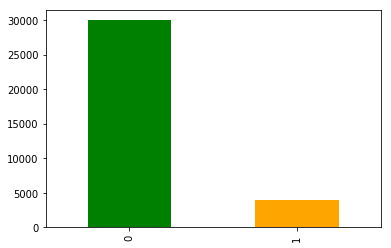

In [12]:
train.labels.value_counts().plot(kind='bar', colors=['green', 'orange'])

# 2.4 Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

### 2.4.1 Correlation Matrix Plot

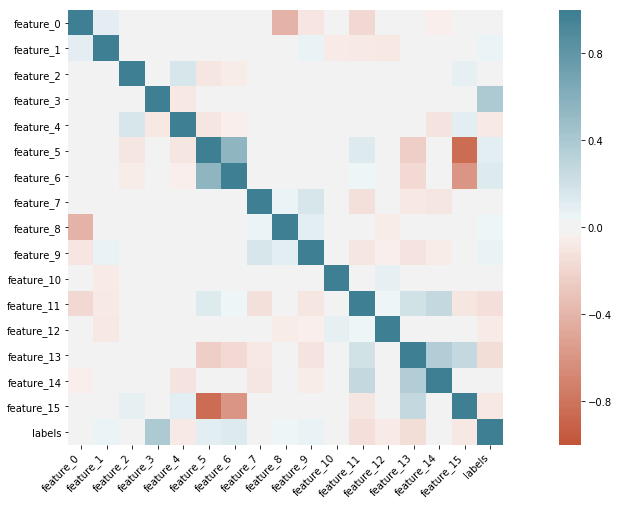

In [17]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 2.4.2 Scatterplot Matrix

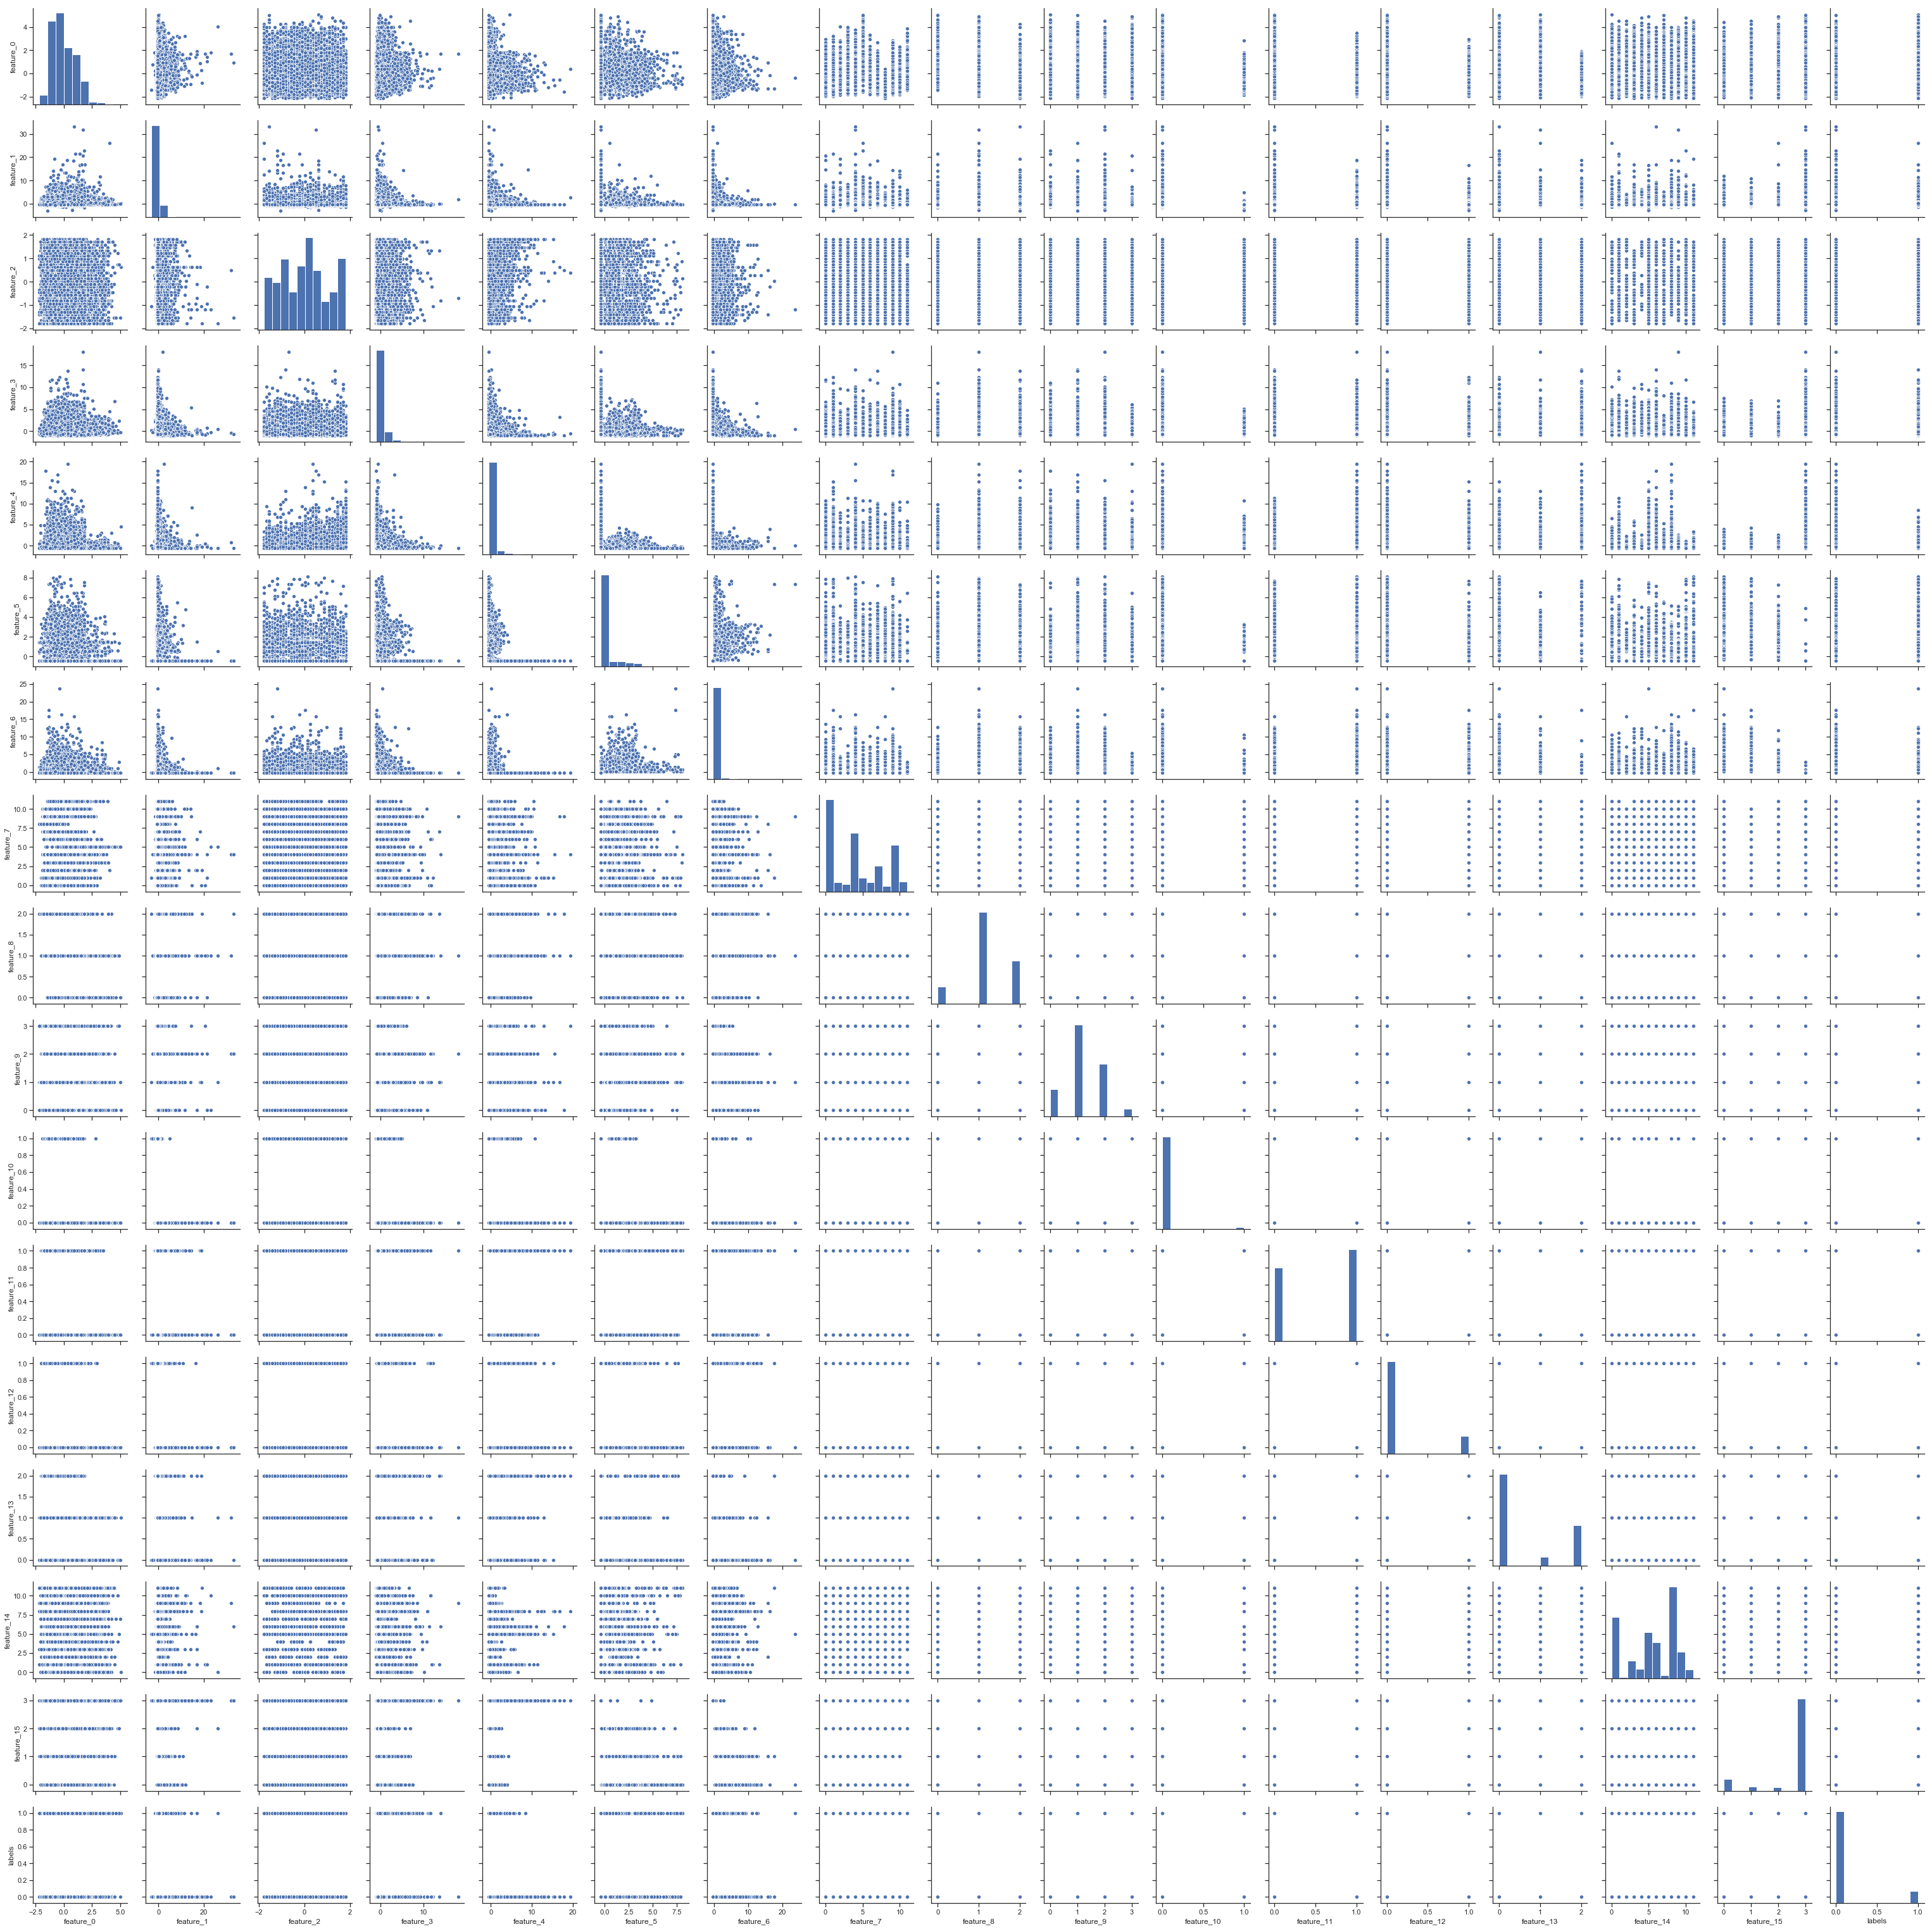

In [18]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train)

# Step3: Data Transformation

There are various methods used to transform variables. Some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods. <br>

<b> Logarithm: </b> Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well. <br> <br>
<b> Square / Cube root: </b> The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero. <br> <br>
<b> Binning: </b> It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.

## 3.1 Treatment of Positively Skewed Data 

<b> Positively Skewed Variables: </b> Total_Safety_Complaints, Cabin_Temperature, Adverse_Weather_Metric, Turbulence_In_gforces <br>
<b> Negatively Skewed Variables: </b> Control_Metric <br>

In [20]:
train_deduplicated.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Severity'],
      dtype='object')

In [21]:
# Exponential Transformation of Positively skewed Data
train_deduplicated['Total_Safety_Complaints'] = np.log(train['Total_Safety_Complaints'])

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [22]:
train_deduplicated['Cabin_Temperature'] = np.log(train['Cabin_Temperature'])
train_deduplicated['Adverse_Weather_Metric'] = np.log(train['Adverse_Weather_Metric'])
train_deduplicated['Turbulence_In_gforces'] = np.log(train['Turbulence_In_gforces'])

### 3.1.1 Replacing (-Inf) Negative Infinity Values With Median Of The Variable

In [23]:
train_deduplicated['Total_Safety_Complaints'] = train_deduplicated['Total_Safety_Complaints'].apply(lambda x: train_deduplicated['Total_Safety_Complaints'].median() if x == -np.inf else x)

In [24]:
train_deduplicated['Cabin_Temperature'] = train_deduplicated['Cabin_Temperature'].apply(lambda x: train_deduplicated['Cabin_Temperature'].median() if x == -np.inf else x)
train_deduplicated['Adverse_Weather_Metric'] = train_deduplicated['Adverse_Weather_Metric'].apply(lambda x: train_deduplicated['Adverse_Weather_Metric'].median() if x == -np.inf else x)
train_deduplicated['Turbulence_In_gforces'] = train_deduplicated['Turbulence_In_gforces'].apply(lambda x: train_deduplicated['Turbulence_In_gforces'].median() if x == -np.inf else x)

### 3.1.2 Re-plotting The Distribution of Variables After Transformation

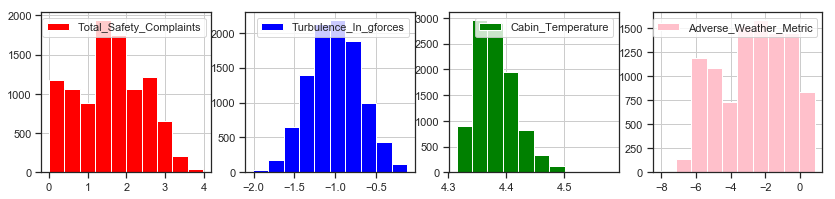

In [25]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal']
cols = ['Total_Safety_Complaints', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Adverse_Weather_Metric']
for i,j in zip(range(1,11),cols):
    plt.subplot(3,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()

## 3.2 Treatment of Negatively Skewed Data

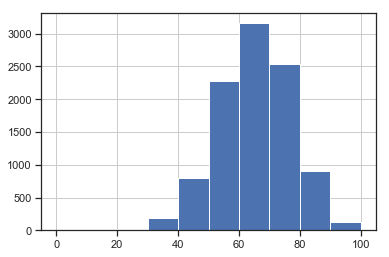

In [26]:
train_deduplicated['Control_Metric'].hist()

## 3.3 Label-encoding of Target Variable

In [27]:
train_deduplicated['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

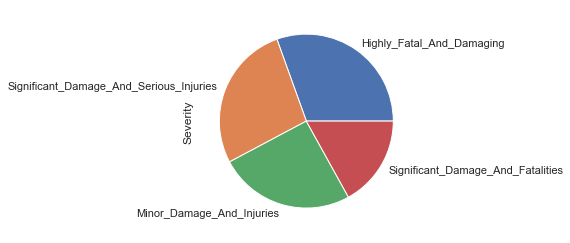

In [28]:
train_deduplicated['Severity'].value_counts().plot(kind='pie')

In [29]:
# Applying labelecoder on "Severity" column
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()

train_deduplicated['Severity'] = laben.fit_transform(train_deduplicated['Severity'])

In [30]:
train_deduplicated['Severity'].value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Severity, dtype: int64

In [31]:
copy_train_deduplicated_data = train_deduplicated.copy()

In [32]:
train_deduplicated = copy_train_deduplicated_data

## 3.4 New Variables Creation

In [33]:
train_deduplicated['elevation_complaints_ratio'] = train_deduplicated['Max_Elevation']/train_deduplicated['Total_Safety_Complaints']
train_deduplicated['elevation_violation_ratio'] = train_deduplicated['Max_Elevation']/train_deduplicated['Violations']

train_deduplicated['avg_adv_weather_metric'] = train_deduplicated['Adverse_Weather_Metric']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['adv_weather_metric_violation_ratio'] = train_deduplicated['Adverse_Weather_Metric']/train_deduplicated['Violations']

train_deduplicated['avg_safety_score'] = train_deduplicated['Safety_Score']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['safety_control_ratio'] = train_deduplicated['Safety_Score']/train_deduplicated['Control_Metric']
train_deduplicated['safety_turbulence_ratio'] = train_deduplicated['Safety_Score']/train_deduplicated['Turbulence_In_gforces']

train_deduplicated['avg_complaints'] = train_deduplicated['Total_Safety_Complaints']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_control_metric'] = train_deduplicated['Control_Metric']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_turbulence'] = train_deduplicated['Turbulence_In_gforces']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_cabin_temp'] = train_deduplicated['Cabin_Temperature']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_elevation'] = train_deduplicated['Max_Elevation']/train_deduplicated['Days_Since_Inspection']
train_deduplicated['avg_violation'] = train_deduplicated['Violations']/train_deduplicated['Days_Since_Inspection']

train_deduplicated['Total_Safety_Complaints_control_ratio'] = train_deduplicated['Control_Metric']/train_deduplicated['Total_Safety_Complaints']
train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = train_deduplicated['Turbulence_In_gforces']/train_deduplicated['Total_Safety_Complaints']
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations']/train_deduplicated['Total_Safety_Complaints']


### 3.4.1 Imputation Of Infinity Variables with Median

In [34]:
train_deduplicated['elevation_complaints_ratio'] = train_deduplicated['elevation_complaints_ratio'].apply(lambda x: train_deduplicated['elevation_complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['elevation_violation_ratio'] = train_deduplicated['elevation_violation_ratio'].apply(lambda x: train_deduplicated['elevation_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_adv_weather_metric'] = train_deduplicated['avg_adv_weather_metric'].apply(lambda x: train_deduplicated['avg_adv_weather_metric'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['adv_weather_metric_violation_ratio'] = train_deduplicated['adv_weather_metric_violation_ratio'].apply(lambda x: train_deduplicated['adv_weather_metric_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_safety_score'] = train_deduplicated['avg_safety_score'].apply(lambda x: train_deduplicated['avg_safety_score'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['safety_control_ratio'] = train_deduplicated['safety_control_ratio'].apply(lambda x: train_deduplicated['safety_control_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['safety_turbulence_ratio'] = train_deduplicated['safety_turbulence_ratio'].apply(lambda x: train_deduplicated['safety_turbulence_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_complaints'] = train_deduplicated['avg_complaints'].apply(lambda x: train_deduplicated['avg_complaints'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_control_metric'] = train_deduplicated['avg_control_metric'].apply(lambda x: train_deduplicated['avg_control_metric'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_turbulence'] = train_deduplicated['avg_turbulence'].apply(lambda x: train_deduplicated['avg_turbulence'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_cabin_temp'] = train_deduplicated['avg_cabin_temp'].apply(lambda x: train_deduplicated['avg_cabin_temp'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_elevation'] = train_deduplicated['avg_elevation'].apply(lambda x: train_deduplicated['avg_elevation'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_violation'] = train_deduplicated['avg_violation'].apply(lambda x: train_deduplicated['avg_violation'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['Total_Safety_Complaints_control_ratio'] = train_deduplicated['Total_Safety_Complaints_control_ratio'].apply(lambda x: train_deduplicated['Total_Safety_Complaints_control_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf else x)


In [35]:
train_deduplicated.isnull().sum()

Safety_Score                                            0
Days_Since_Inspection                                   0
Total_Safety_Complaints                                 0
Control_Metric                                          0
Turbulence_In_gforces                                   0
Cabin_Temperature                                       0
Accident_Type_Code                                      0
Max_Elevation                                           0
Violations                                              0
Adverse_Weather_Metric                                  0
Severity                                                0
elevation_complaints_ratio                              0
elevation_violation_ratio                               0
avg_adv_weather_metric                                  0
adv_weather_metric_violation_ratio                      0
avg_safety_score                                        0
safety_control_ratio                                    0
safety_turbule

In [36]:
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == np.nan else x)

### 3.4.2 Plotting Newly Created Variables

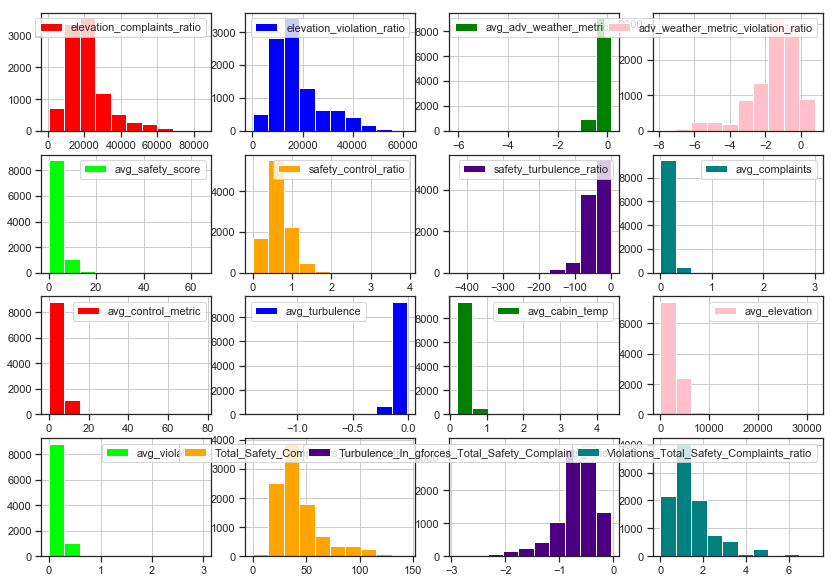

In [37]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()

### 3.4.3 Data Normalization

#### 3.4.3.1 LOG of Values

In [38]:
train_deduplicated['elevation_complaints_ratio']=np.log(train_deduplicated['elevation_complaints_ratio'])
train_deduplicated['elevation_violation_ratio']=np.log(train_deduplicated['elevation_violation_ratio'])
train_deduplicated['avg_safety_score']=np.log(train_deduplicated['avg_safety_score'])
train_deduplicated['safety_control_ratio']=np.log(train_deduplicated['safety_control_ratio'])
train_deduplicated['avg_complaints']=np.log(train_deduplicated['avg_complaints'])
train_deduplicated['avg_control_metric']=np.log(train_deduplicated['avg_control_metric'])
train_deduplicated['avg_cabin_temp']=np.log(train_deduplicated['avg_cabin_temp'])
train_deduplicated['avg_elevation']=np.log(train_deduplicated['avg_elevation'])
train_deduplicated['avg_violation']=np.log(train_deduplicated['avg_violation'])
train_deduplicated['Total_Safety_Complaints_control_ratio']=np.log(train_deduplicated['Total_Safety_Complaints_control_ratio'])
train_deduplicated['Violations_Total_Safety_Complaints_ratio']=np.log(train_deduplicated['Violations_Total_Safety_Complaints_ratio'])


c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-

#### 3.4.3.2 EXPONENT of Values

In [39]:
train_deduplicated['avg_adv_weather_metric']=np.exp(train_deduplicated['avg_adv_weather_metric'])
train_deduplicated['adv_weather_metric_violation_ratio']=np.exp(train_deduplicated['adv_weather_metric_violation_ratio'])
train_deduplicated['safety_turbulence_ratio']=np.exp(train_deduplicated['safety_turbulence_ratio'])
train_deduplicated['avg_turbulence']=np.exp(train_deduplicated['avg_turbulence'])
train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio']=np.exp(train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'])


### Testing of Data after Transformation

### 3.4.4 Imputation of Negative and Positive Infinity Values Arisese from LOG & EXPONENT

In [48]:
#train_deduplicated['elevation_complaints_ratio'] = train_deduplicated['elevation_complaints_ratio'].apply(lambda x: train_deduplicated['elevation_complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['elevation_violation_ratio'] = train_deduplicated['elevation_violation_ratio'].apply(lambda x: train_deduplicated['elevation_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

#train_deduplicated['avg_adv_weather_metric'] = train_deduplicated['avg_adv_weather_metric'].apply(lambda x: train_deduplicated['avg_adv_weather_metric'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['adv_weather_metric_violation_ratio'] = train_deduplicated['adv_weather_metric_violation_ratio'].apply(lambda x: train_deduplicated['adv_weather_metric_violation_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_safety_score'] = train_deduplicated['avg_safety_score'].apply(lambda x: train_deduplicated['avg_safety_score'].median() if x == -np.inf else x)
train_deduplicated['safety_control_ratio'] = train_deduplicated['safety_control_ratio'].apply(lambda x: train_deduplicated['safety_control_ratio'].median() if x == -np.inf else x)
#train_deduplicated['safety_turbulence_ratio'] = train_deduplicated['safety_turbulence_ratio'].apply(lambda x: train_deduplicated['safety_turbulence_ratio'].median() if x == -np.inf or x == np.inf else x)

train_deduplicated['avg_complaints'] = train_deduplicated['avg_complaints'].apply(lambda x: train_deduplicated['avg_complaints'].median() if x == -np.inf else x)
train_deduplicated['avg_control_metric'] = train_deduplicated['avg_control_metric'].apply(lambda x: train_deduplicated['avg_control_metric'].median() if x == -np.inf else x)
#train_deduplicated['avg_turbulence'] = train_deduplicated['avg_turbulence'].apply(lambda x: train_deduplicated['avg_turbulence'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['avg_cabin_temp'] = train_deduplicated['avg_cabin_temp'].apply(lambda x: train_deduplicated['avg_cabin_temp'].median() if x == -np.inf or x == np.inf else x)
#train_deduplicated['avg_elevation'] = train_deduplicated['avg_elevation'].apply(lambda x: train_deduplicated['avg_elevation'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['avg_violation'] = train_deduplicated['avg_violation'].apply(lambda x: train_deduplicated['avg_violation'].median() if x == -np.inf else x)

train_deduplicated['Total_Safety_Complaints_control_ratio'] = train_deduplicated['Total_Safety_Complaints_control_ratio'].apply(lambda x: train_deduplicated['Total_Safety_Complaints_control_ratio'].median() if x == -np.inf else x)
#train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'] = train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Turbulence_In_gforces_Total_Safety_Complaints_ratio'].median() if x == -np.inf or x == np.inf else x)
train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == -np.inf else x)


In [49]:
train_deduplicated.isnull().sum()

Safety_Score                                            0
Days_Since_Inspection                                   0
Total_Safety_Complaints                                 0
Control_Metric                                          0
Turbulence_In_gforces                                   0
Cabin_Temperature                                       0
Accident_Type_Code                                      0
Max_Elevation                                           0
Violations                                              0
Adverse_Weather_Metric                                  0
Severity                                                0
elevation_complaints_ratio                              0
elevation_violation_ratio                               0
avg_adv_weather_metric                                  0
adv_weather_metric_violation_ratio                      0
avg_safety_score                                        0
safety_control_ratio                                    0
safety_turbule

In [50]:
#train_deduplicated['Violations_Total_Safety_Complaints_ratio'] = train_deduplicated['Violations_Total_Safety_Complaints_ratio'].apply(lambda x: train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median() if x == np.nan else x)
train_deduplicated['Violations_Total_Safety_Complaints_ratio'].fillna(train_deduplicated['Violations_Total_Safety_Complaints_ratio'].median(), inplace=True)

In [51]:
train_deduplicated.isnull().sum()

Safety_Score                                           0
Days_Since_Inspection                                  0
Total_Safety_Complaints                                0
Control_Metric                                         0
Turbulence_In_gforces                                  0
Cabin_Temperature                                      0
Accident_Type_Code                                     0
Max_Elevation                                          0
Violations                                             0
Adverse_Weather_Metric                                 0
Severity                                               0
elevation_complaints_ratio                             0
elevation_violation_ratio                              0
avg_adv_weather_metric                                 0
adv_weather_metric_violation_ratio                     0
avg_safety_score                                       0
safety_control_ratio                                   0
safety_turbulence_ratio        

### 3.4.5 Plot After Imputation

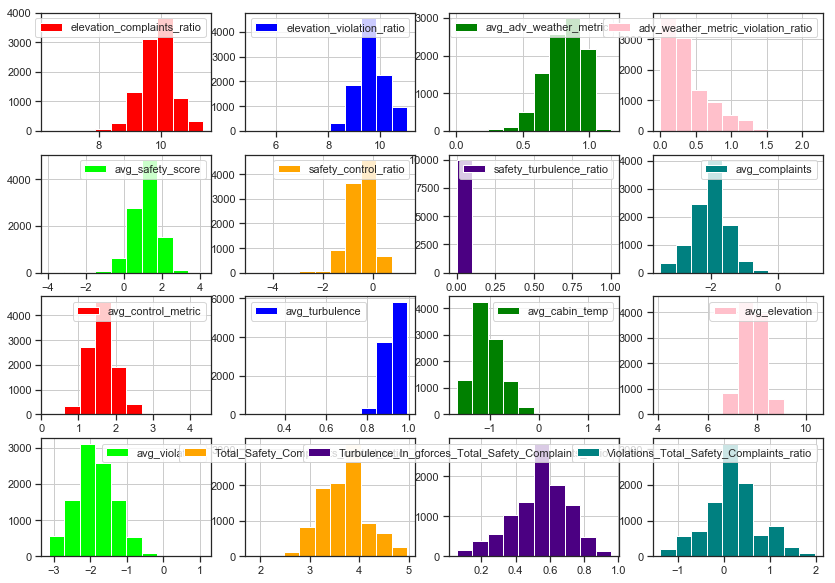

In [52]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()

# Step4: Separating X and Y

In [19]:
train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

In [20]:
train.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


## 4.1 Re-setting Index Before Splitting

In [21]:
train.reset_index(drop=True, inplace=True)

In [22]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


## 4.2 Split Data

In [23]:
x = train.drop(['labels'], axis=1)
y = train['labels']

# Step5: Creating Train and Test Set In Ratio 80:20

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Step6: Model Building

## 6.1 Identification Of Best Features

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)


Num Features: 3
Selected Features: [False False False  True False False False False False False False  True
  True False False False]
Feature Ranking: [10 12 11  1  3  6  5 14  9  8  4  1  1  2 13  7]


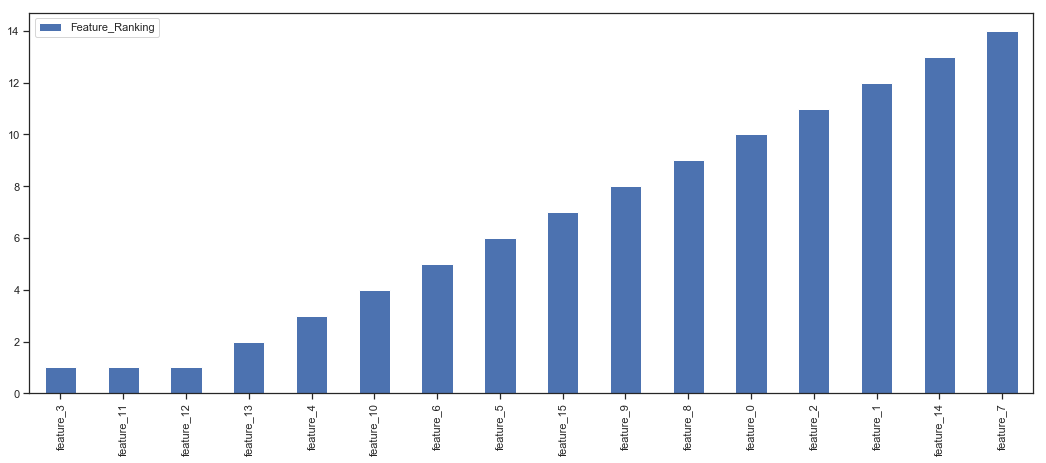

In [26]:
df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

## 6.2 Importing and Model Fitting

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### 6.2.1 Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.8894131524624005
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[5732  233]
 [ 517  300]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5965
           1       0.56      0.37      0.44       817

   micro avg       0.89      0.89      0.89      6782
   macro avg       0.74      0.66      0.69      6782
weighted avg       0.87      0.89      0.88      6782



### 6.2.2 Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Accuracy of Random Forest:  0.9060749041580655
Confusion matrix 
 [[5807  158]
 [ 479  338]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5965
           1       0.68      0.41      0.51       817

   micro avg       0.91      0.91      0.91      6782
   macro avg       0.80      0.69      0.73      6782
weighted avg       0.89      0.91      0.90      6782



# Phase2: Applying Model On Test Data

In [30]:
test = pd.read_csv('Test.csv')

test.shape

(11303, 16)

In [31]:
test.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


In [32]:
test_for_prediction = test[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15']]

In [35]:
#Predict "Accident_ID	Severity"

prediction_from_dt  = best_clf_dt.predict(test_for_prediction)
df_prediction_from_dt = pd.DataFrame({'labels': prediction_from_dt})
df_prediction_from_dt.to_excel("Final_output_prediction_from_dt.xlsx")

prediction_from_rf  = best_clf_rf.predict(test_for_prediction)
df_prediction_from_rf = pd.DataFrame({'labels': prediction_from_rf})
df_prediction_from_rf.to_excel("Final_output_prediction_from_rf.xlsx")
